## CITS2402 - Introduction to Data Science - Assignment 1.

### Comparing Demographic Trends in Australian Census Data (2021 and 2016)

**Date:** August 2025.

## Declaration

This declaration should be completed and remain attached to the top of your submission.

*I/we am/are aware of the University’s [policy on academic conduct](https://www.uwa.edu.au/policy/-/media/project/uwa/uwa/policy-library/policy/student-administration/academic-integrity/academic-integrity-policy.doc) and I declare that this assignment is entirely the work of the author(s) listed below and that suitable acknowledgement has been made for any sources of information used in preparing it. I have retained a copy for my own records.*

- Name 1: Thomas Graham Nylund
- Student ID 1: 22708177
- Date: 19/09/2025

<hr>

### Introduction
An agency of the federal government, the National Indigenous Australians Agency outlines the concept of 'Closing the Gap' as "priority reforms and ambitious targets that are changing the way governments work to improve life outcomes for Indigenous Australians."[1] These targets cover topics such as health and wellbeing, education and employment, justice, housing, and others. This assignment will use data analysis methods to seek to answer the question: "From 2016 to 2021, has meaningful progress been made to 'Close The Gap' between Indigenous Australians and the broader population of Australia, in terms of education, housing and economic participation".
<hr>



### Accessing Data
- I began by using the 'DataPacks' on the Census section of the ABS website. I selected the Census years of 2016 and 2021 and changed the 'DataPack type' to 'Aboriginal and/or Torres Strait Islander Peoples (Indigenous) Profile. I changed the geography option to 'Australia' to obtain data that is not specific to a certain region. The reason for not using more specific geographical breakdowns, such as looking at data from an 'SA4' or 'SAL' level is due to the nature of studying data related to Indigenous Persons. For example, when using 'SAL' (suburbs and localities) data, this excludes a large portion of Indigenous people who are 'migratory' and maintain no fixed address. The ABS includes these people in the SAL codes of '9494' and '9797'. The only way to obtain a fair comparison which does not exclude Indigenous people was to use overall data for the whole of Australia.

- I used the Metadata Datapacks to know the full names of the table columns in the datapacks, which I then converted in my dataframes.
<hr>

### Education

2021 Census Year 12 Completion Rates:
   Indigenous_Grad_%  Non_Indigenous_Grad_%
0              23.52                   49.5

2016 Census Year 12 Completion Rates:
   Indigenous_Grad_%  Non_Indigenous_Grad_%
0              19.57                  45.46

Changes from 2016 to 2021:
Indigenous: +3.95 percentage points
Non-Indigenous: +4.04 percentage points


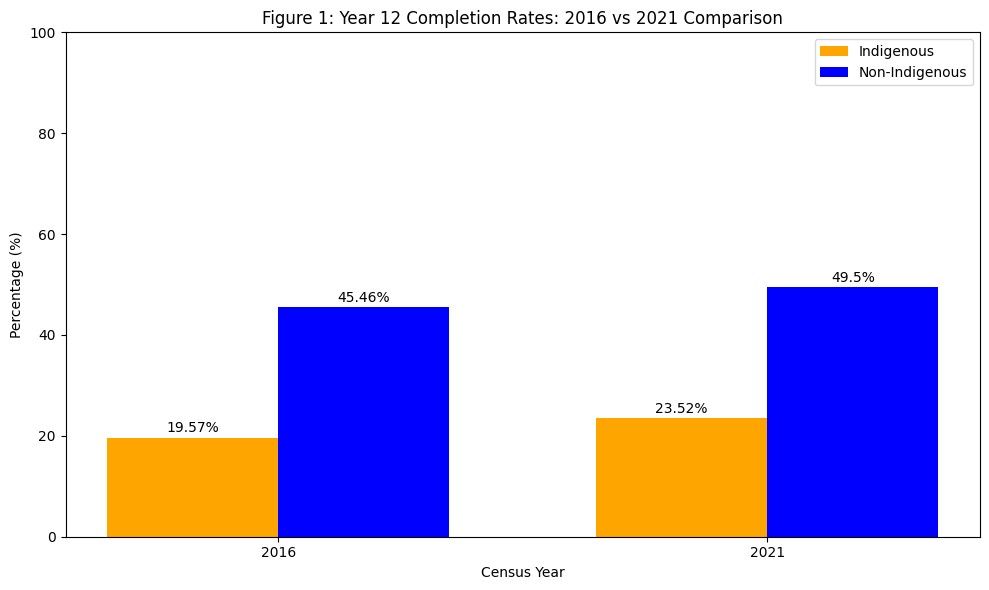

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Load 2021 census totals
totalPeople2021 = pd.read_csv('2021Census_I01A_AUS_AUS.csv')
totalPeople2021 = totalPeople2021[['Tot_p_Indig_P', 'Tot_p_NonInd_P']]
totalPeople2021 = totalPeople2021.rename(columns={
    'Tot_p_Indig_P': 'Total_Indigenous_Population',
    'Tot_p_NonInd_P': 'Total_non_Indigenous_Population'
})

# Load 2021 education completion
education2021 = pd.read_csv('2021Census_I01C_AUS_AUS.csv')
education2021 = education2021[['HYSC_Y12_e_Ind_P','HYSC_Y12_e_No_In_P']]
education2021 = education2021.rename(columns={
    'HYSC_Y12_e_Ind_P': 'Indigenous_Year_12_Completed',
    'HYSC_Y12_e_No_In_P': 'non_Indigenous_Year_12_Completed'
})

# Load 2016 census totals
totalPeople2016 = pd.read_csv('2016Census_I01A_AUS.csv')
totalPeople2016 = totalPeople2016[['Tot_p_Indig_P', 'Tot_p_NonInd_P']]
totalPeople2016 = totalPeople2016.rename(columns={
    'Tot_p_Indig_P': 'Total_Indigenous_Population',
    'Tot_p_NonInd_P': 'Total_non_Indigenous_Population'
})

# Load 2016 education completion
education2016 = pd.read_csv('2016Census_I01B_AUS.csv')
education2016 = education2016[['HYSC_Y12_e_Ind_P','HYSC_Y12_e_No_In_P']]
education2016 = education2016.rename(columns={
    'HYSC_Y12_e_Ind_P': 'Indigenous_Year_12_Completed',
    'HYSC_Y12_e_No_In_P': 'non_Indigenous_Year_12_Completed'
})

# Calculate percentages for 2021
graduation_percentages_2021 = pd.DataFrame()
graduation_percentages_2021['Indigenous_Grad_%'] = (
    education2021['Indigenous_Year_12_Completed'] /
    totalPeople2021['Total_Indigenous_Population'] * 100
).round(2)

graduation_percentages_2021['Non_Indigenous_Grad_%'] = (
    education2021['non_Indigenous_Year_12_Completed'] /
    totalPeople2021['Total_non_Indigenous_Population'] * 100
).round(2)

# Calculate percentages for 2016
graduation_percentages_2016 = pd.DataFrame()
graduation_percentages_2016['Indigenous_Grad_%'] = (
    education2016['Indigenous_Year_12_Completed'] /
    totalPeople2016['Total_Indigenous_Population'] * 100
).round(2)

graduation_percentages_2016['Non_Indigenous_Grad_%'] = (
    education2016['non_Indigenous_Year_12_Completed'] /
    totalPeople2016['Total_non_Indigenous_Population'] * 100
).round(2)

# Print results
print("2021 Census Year 12 Completion Rates:")
print(graduation_percentages_2021)
print("\n2016 Census Year 12 Completion Rates:")
print(graduation_percentages_2016)

# Create comparison dataframe for plotting
comparison_data = pd.DataFrame({
    'Indigenous 2016': graduation_percentages_2016['Indigenous_Grad_%'].iloc[0],
    'Indigenous 2021': graduation_percentages_2021['Indigenous_Grad_%'].iloc[0],
    'Non-Indigenous 2016': graduation_percentages_2016['Non_Indigenous_Grad_%'].iloc[0],
    'Non-Indigenous 2021': graduation_percentages_2021['Non_Indigenous_Grad_%'].iloc[0]
}, index=[0])

# Calculate changes
indigenous_change = graduation_percentages_2021['Indigenous_Grad_%'].iloc[0] - graduation_percentages_2016['Indigenous_Grad_%'].iloc[0]
non_indigenous_change = graduation_percentages_2021['Non_Indigenous_Grad_%'].iloc[0] - graduation_percentages_2016['Non_Indigenous_Grad_%'].iloc[0]

print(f"\nChanges from 2016 to 2021:")
print(f"Indigenous: {indigenous_change:+.2f} percentage points")
print(f"Non-Indigenous: {non_indigenous_change:+.2f} percentage points")

# Create comparison plot showing both years side by side
fig, ax = plt.subplots(figsize=(10, 6))

x = range(2)
width = 0.35

indigenous_values = [graduation_percentages_2016['Indigenous_Grad_%'].iloc[0], 
                    graduation_percentages_2021['Indigenous_Grad_%'].iloc[0]]
non_indigenous_values = [graduation_percentages_2016['Non_Indigenous_Grad_%'].iloc[0], 
                        graduation_percentages_2021['Non_Indigenous_Grad_%'].iloc[0]]

bars1 = ax.bar([i - width/2 for i in x], indigenous_values, width, label='Indigenous', color='orange')
bars2 = ax.bar([i + width/2 for i in x], non_indigenous_values, width, label='Non-Indigenous', color='blue')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height}%', ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Census Year')
ax.set_ylabel('Percentage (%)')
ax.set_title('Figure 1: Year 12 Completion Rates: 2016 vs 2021 Comparison')
ax.set_xticks(x)
ax.set_xticklabels(['2016', '2021'])
ax.legend()
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

2021 Census Bachelors Degree Completion Rates:
   Indigenous_Grad_%  Non_Indigenous_Grad_%
0                3.5                  15.29

2016 Census Bahelors Degree Completion Rates:
   Indigenous_Grad_%  Non_Indigenous_Grad_%
0               2.78                  13.37

Changes from 2016 to 2021:
Indigenous: +0.72 percentage points
Non-Indigenous: +1.92 percentage points


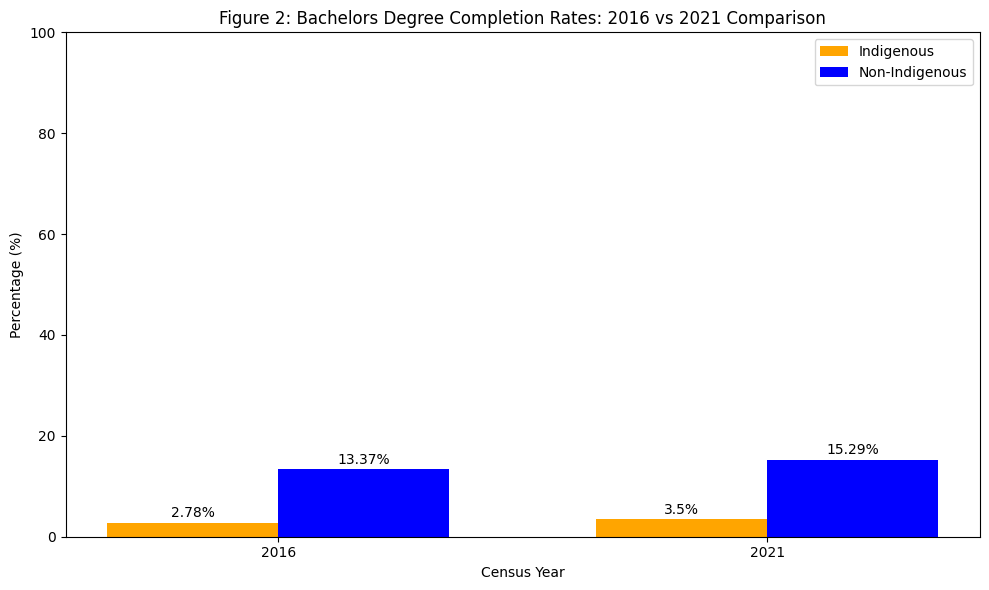

In [116]:
# Load 2021 census totals
totalPeople2021 = pd.read_csv('2021Census_I01A_AUS_AUS.csv')
totalPeople2021 = totalPeople2021[['Tot_p_Indig_P', 'Tot_p_NonInd_P']]
totalPeople2021 = totalPeople2021.rename(columns={
    'Tot_p_Indig_P': 'Total_Indigenous_Population',
    'Tot_p_NonInd_P': 'Total_non_Indigenous_Population'
})

# Load 2021 education completion
education2021 = pd.read_csv('2021Census_I19A_AUS_AUS.csv')
education2021 = education2021[['HnsQ_BDL_Ind_P','HnsQ_BDL_No_Ind_P']]
education2021 = education2021.rename(columns={
    'HnsQ_BDL_Ind_P': 'Indigenous_Bachelors_Completed',
    'HnsQ_BDL_No_Ind_P': 'non_Indigenous_Bachelors_Completed'
})

# Load 2016 census totals
totalPeople2016 = pd.read_csv('2016Census_I01A_AUS.csv')
totalPeople2016 = totalPeople2016[['Tot_p_Indig_P', 'Tot_p_NonInd_P']]
totalPeople2016 = totalPeople2016.rename(columns={
    'Tot_p_Indig_P': 'Total_Indigenous_Population',
    'Tot_p_NonInd_P': 'Total_non_Indigenous_Population'
})

# Load 2016 education completion
education2016 = pd.read_csv('2016Census_I14A_AUS.csv')
education2016 = education2016[['NsQ_BDL_Ind_P','NsQ_BDL_No_Ind_P']]
education2016 = education2016.rename(columns={
    'NsQ_BDL_Ind_P': 'Indigenous_Bachelors_Completed',
    'NsQ_BDL_No_Ind_P': 'non_Indigenous_Bachelors_Completed'
})

# Calculate percentages for 2021
graduation_percentages_2021 = pd.DataFrame()
graduation_percentages_2021['Indigenous_Grad_%'] = (
    education2021['Indigenous_Bachelors_Completed'] /
    totalPeople2021['Total_Indigenous_Population'] * 100
).round(2)

graduation_percentages_2021['Non_Indigenous_Grad_%'] = (
    education2021['non_Indigenous_Bachelors_Completed'] /
    totalPeople2021['Total_non_Indigenous_Population'] * 100
).round(2)

# Calculate percentages for 2016
graduation_percentages_2016 = pd.DataFrame()
graduation_percentages_2016['Indigenous_Grad_%'] = (
    education2016['Indigenous_Bachelors_Completed'] /
    totalPeople2016['Total_Indigenous_Population'] * 100
).round(2)

graduation_percentages_2016['Non_Indigenous_Grad_%'] = (
    education2016['non_Indigenous_Bachelors_Completed'] /
    totalPeople2016['Total_non_Indigenous_Population'] * 100
).round(2)

# Print results
print("2021 Census Bachelors Degree Completion Rates:")
print(graduation_percentages_2021)
print("\n2016 Census Bahelors Degree Completion Rates:")
print(graduation_percentages_2016)

# Create comparison dataframe for plotting
comparison_data = pd.DataFrame({
    'Indigenous 2016': graduation_percentages_2016['Indigenous_Grad_%'].iloc[0],
    'Indigenous 2021': graduation_percentages_2021['Indigenous_Grad_%'].iloc[0],
    'Non-Indigenous 2016': graduation_percentages_2016['Non_Indigenous_Grad_%'].iloc[0],
    'Non-Indigenous 2021': graduation_percentages_2021['Non_Indigenous_Grad_%'].iloc[0]
}, index=[0])

# Calculate changes
indigenous_change = graduation_percentages_2021['Indigenous_Grad_%'].iloc[0] - graduation_percentages_2016['Indigenous_Grad_%'].iloc[0]
non_indigenous_change = graduation_percentages_2021['Non_Indigenous_Grad_%'].iloc[0] - graduation_percentages_2016['Non_Indigenous_Grad_%'].iloc[0]

print(f"\nChanges from 2016 to 2021:")
print(f"Indigenous: {indigenous_change:+.2f} percentage points")
print(f"Non-Indigenous: {non_indigenous_change:+.2f} percentage points")

# Create comparison plot showing both years side by side
fig, ax = plt.subplots(figsize=(10, 6))

x = range(2)
width = 0.35

indigenous_values = [graduation_percentages_2016['Indigenous_Grad_%'].iloc[0], 
                    graduation_percentages_2021['Indigenous_Grad_%'].iloc[0]]
non_indigenous_values = [graduation_percentages_2016['Non_Indigenous_Grad_%'].iloc[0], 
                        graduation_percentages_2021['Non_Indigenous_Grad_%'].iloc[0]]

bars1 = ax.bar([i - width/2 for i in x], indigenous_values, width, label='Indigenous', color='orange')
bars2 = ax.bar([i + width/2 for i in x], non_indigenous_values, width, label='Non-Indigenous', color='blue')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height}%', ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Census Year')
ax.set_ylabel('Percentage (%)')
ax.set_title('Figure 2: Bachelors Degree Completion Rates: 2016 vs 2021 Comparison')
ax.set_xticks(x)
ax.set_xticklabels(['2016', '2021'])
ax.legend()
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

A key metric of closing the gap is Year 12 completion: "School attendance and engagement are key drivers of Target 5 of the National Agreement on Closing the Gap (Year 12 attainment)"[2]. As seen in Figure 1, the percentage of Indigenous Australians who have completed year 12 is substantially less than non-Indigenous Australians (19.57% to 45.46% in 2016). Despite an increase from 2016 to 2021 in Indigenous Year 12 completion of 3.95% from 19.57% to 23.52%, this is still less than the increase in non-Indigenous Australians of 4.04%. This highlights the importance of comparing the two groups when it comes to assessing 'Closing the Gap'. Although education standards for Indigenous people are improving, the gap is still widening, or at least remaining the same. 

The gap in education is also seen in tertiary education as demonstrated in Figure 2. In 2016, 2.78% of Indigenous people had completed a Bachelors degree, compared to 13.37% of non-Indigenous Australians. Despite an increase in of 0.72% to 3.5 in 2021, this is still less than the 1.92% increase to 13.37% for non-Indigenous Australians. This again is demonstrating that despite improvements, the gap is not 'closing'.
<hr>

### Housing

   Proportion_of_Indigenous_Households_That_Need_One_Or_More_Bedrooms  \
0                                               10.4                    

   Proportion_of_non_Indigenous_Households_That_Need_One_Or_More_Bedrooms  
0                                                3.6                       
   Proportion_of_Indigenous_Households_That_Need_One_Or_More_Bedrooms  \
0                                                8.9                    

   Proportion_of_non_Indigenous_Households_That_Need_One_Or_More_Bedrooms  
0                                                3.1                       


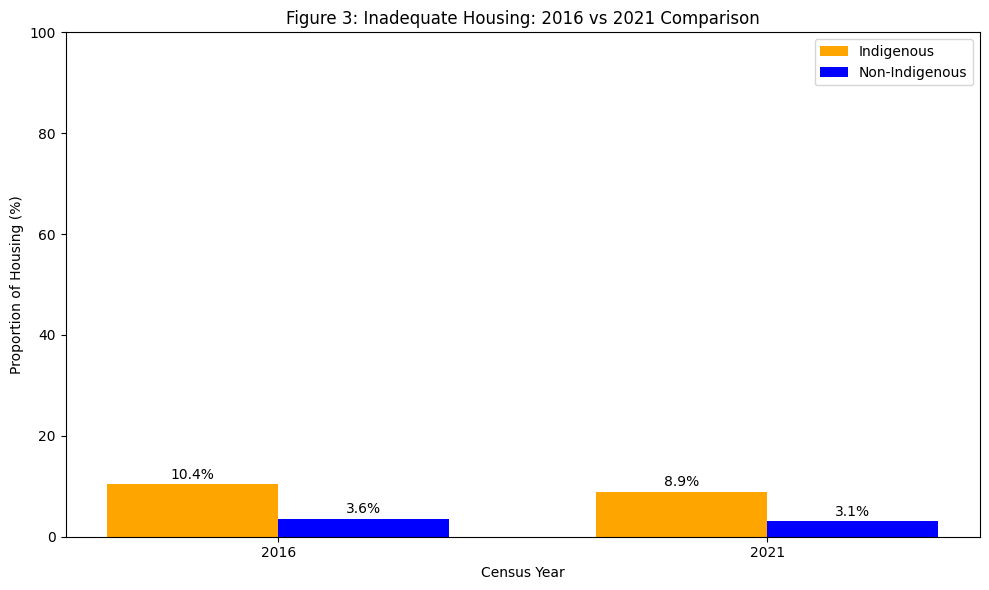

In [117]:
import pandas as pd
import matplotlib.pyplot as plt


peoplePerRoom2016 = pd.read_csv('2016Census_I04_AUS.csv')
peoplePerRoom2016 = peoplePerRoom2016[['P_d_n_x_b_In_ps_hh_w_In_p','P_d_n_x_b_No_In_p_oth_hh']]
peoplePerRoom2016 = peoplePerRoom2016.rename(columns={
    'P_d_n_x_b_In_ps_hh_w_In_p': 'Proportion_of_Indigenous_Households_That_Need_One_Or_More_Bedrooms',
    'P_d_n_x_b_No_In_p_oth_hh': 'Proportion_of_non_Indigenous_Households_That_Need_One_Or_More_Bedrooms'
})
print(peoplePerRoom2016)

peoplePerRoom2021 = pd.read_csv('2021Census_I04_AUS_AUS.csv')
peoplePerRoom2021 = peoplePerRoom2021[['P_d_n_x_b_Hh_w_In_p','P_d_n_x_b_No_Oth_hh']]
peoplePerRoom2021 = peoplePerRoom2021.rename(columns={
    'P_d_n_x_b_Hh_w_In_p': 'Proportion_of_Indigenous_Households_That_Need_One_Or_More_Bedrooms',
    'P_d_n_x_b_No_Oth_hh': 'Proportion_of_non_Indigenous_Households_That_Need_One_Or_More_Bedrooms'
})
print(peoplePerRoom2021)

fig, ax = plt.subplots(figsize=(10, 6))

x = range(2)
width = 0.35

indigenous_values = [peoplePerRoom2016['Proportion_of_Indigenous_Households_That_Need_One_Or_More_Bedrooms'].iloc[0], 
                    peoplePerRoom2021['Proportion_of_Indigenous_Households_That_Need_One_Or_More_Bedrooms'].iloc[0]]
non_indigenous_values = [peoplePerRoom2016['Proportion_of_non_Indigenous_Households_That_Need_One_Or_More_Bedrooms'].iloc[0], 
                        peoplePerRoom2021['Proportion_of_non_Indigenous_Households_That_Need_One_Or_More_Bedrooms'].iloc[0]]

bars1 = ax.bar([i - width/2 for i in x], indigenous_values, width, label='Indigenous', color='orange')
bars2 = ax.bar([i + width/2 for i in x], non_indigenous_values, width, label='Non-Indigenous', color='blue')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height}%', ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Census Year')
ax.set_ylabel('Proportion of Housing (%)')
ax.set_title('Figure 3: Inadequate Housing: 2016 vs 2021 Comparison')
ax.set_xticks(x)
ax.set_xticklabels(['2016', '2021'])
ax.legend()
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

   Indigenous_People_Who_Own_Homes  Non_Indigenous_People_Who_Own_Homes
0                             4.94                                11.87
   Indigenous_People_Who_Own_Homes  Non_Indigenous_People_Who_Own_Homes
0                             5.96                                12.08


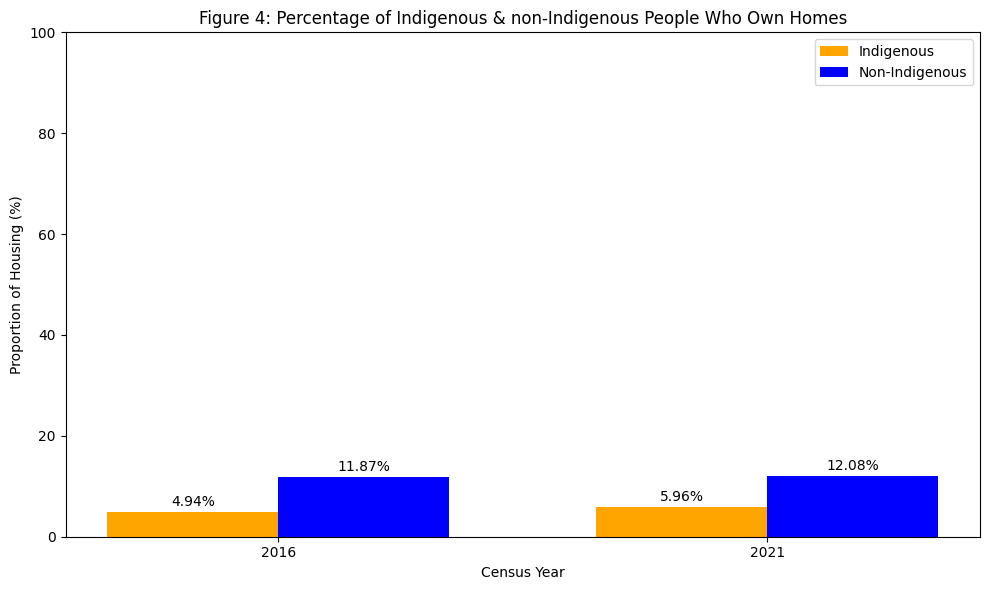

In [139]:
# Load 2016 census totals
totalPeople2016 = pd.read_csv('2016Census_I01A_AUS.csv')
totalPeople2016 = totalPeople2016[['Tot_p_Indig_P', 'Tot_p_NonInd_P']]
totalPeople2016 = totalPeople2016.rename(columns={
    'Tot_p_Indig_P': 'Total_Indigenous_Population',
    'Tot_p_NonInd_P': 'Total_non_Indigenous_Population'
})

# Load 2016 census values
ownershipRates2016 = pd.read_csv('2016Census_I10A_AUS.csv')
ownershipRates2016 = ownershipRates2016[['H_w_In_ps_OO_Tot', 'OH_OO_DS_Tot']]
ownershipRates2016 = ownershipRates2016.rename(columns={
    'H_w_In_ps_OO_Tot': 'Households_Owned_Outright_By_Indigenous_Persons',
    'OH_OO_DS_Tot': 'Households_Owned_Outright_By_non_Indigenous_Persons'
})

# Calculate percentages for 2016
ownershipPercentages2016 = pd.DataFrame()
ownershipPercentages2016['Indigenous_People_Who_Own_Homes'] = (
    ownershipRates2016['Households_Owned_Outright_By_Indigenous_Persons'] /
    (totalPeople2016['Total_Indigenous_Population']) * 100
).round(2)
ownershipPercentages2016['Non_Indigenous_People_Who_Own_Homes'] = (
    ownershipRates2016['Households_Owned_Outright_By_non_Indigenous_Persons'] / 
    (totalPeople2016['Total_non_Indigenous_Population']) * 100
).round(2)

# Load 2021 census totals
totalPeople2021 = pd.read_csv('2021Census_I01A_AUS_AUS.csv')
totalPeople2021 = totalPeople2021[['Tot_p_Indig_P', 'Tot_p_NonInd_P']]
totalPeople2021 = totalPeople2021.rename(columns={
    'Tot_p_Indig_P': 'Total_Indigenous_Population',
    'Tot_p_NonInd_P': 'Total_non_Indigenous_Population'
})

# Load 2021 census values
ownershipRates2021 = pd.read_csv('2021Census_I13A_AUS_AUS.csv')
ownershipRates2021 = ownershipRates2021[['Ow_o_Tot_HATSIP', 'Ow_o_Tot_Oth_h']]
ownershipRates2021 = ownershipRates2021.rename(columns={
    'Ow_o_Tot_HATSIP': 'Households_Owned_Outright_By_Indigenous_Persons',
    'Ow_o_Tot_Oth_h': 'Households_Owned_Outright_By_non_Indigenous_Persons'
})

# Calculate percentages for 2021
ownershipPercentages2021 = pd.DataFrame()
ownershipPercentages2021['Indigenous_People_Who_Own_Homes'] = (
    ownershipRates2021['Households_Owned_Outright_By_Indigenous_Persons'] /
    (totalPeople2021['Total_Indigenous_Population']) * 100
).round(2)
ownershipPercentages2021['Non_Indigenous_People_Who_Own_Homes'] = (
    ownershipRates2021['Households_Owned_Outright_By_non_Indigenous_Persons'] / 
    (totalPeople2021['Total_non_Indigenous_Population']) * 100
).round(2)

print(ownershipPercentages2016)
print(ownershipPercentages2021)

# Plot of Data
fig, ax = plt.subplots(figsize=(10, 6))

x = range(2)
width = 0.35

indigenous_values = [ownershipPercentages2016['Indigenous_People_Who_Own_Homes'].iloc[0], ownershipPercentages2021['Indigenous_People_Who_Own_Homes'].iloc[0]]
non_indigenous_values = [ownershipPercentages2016['Non_Indigenous_People_Who_Own_Homes'].iloc[0], ownershipPercentages2021['Non_Indigenous_People_Who_Own_Homes'].iloc[0]]

bars1 = ax.bar([i - width/2 for i in x], indigenous_values, width, label='Indigenous', color='orange')
bars2 = ax.bar([i + width/2 for i in x], non_indigenous_values, width, label='Non-Indigenous', color='blue')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height}%', ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Census Year')
ax.set_ylabel('Proportion of Housing (%)')
ax.set_title('Figure 4: Percentage of Indigenous & non-Indigenous People Who Own Homes')
ax.set_xticks(x)
ax.set_xticklabels(['2016', '2021'])
ax.legend()
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()



The 9th of the 19 'Closing the Gap' socio-economic targets is 'Aboriginal and Torres Strait Islander people secure appropriate, affordable housing that is aligned with their priorities and need.' Specifically, target 9A is: 'increase the proportion of Aboriginal and Torres Strait Islander people living in appropriately sized (not overcrowded) housing' [3]. The ABS measures housing suitability by a matrix, with factors such as: the number of usual residents in the house, their relationship to each other, their age and sex etc [4]. Figure 3 demonstrates the proportion of housing that is not suitable for the amount and combination of its inhabitants, for both Indigenous and non-Indigenous households. Figure 3 demonstrates that unsuitable housing has actually decreased by 1.5% for Indigenous households from 2016 to 2021. Non-Indigenous Households have also seen a 0.5% improvement. This is a positive example of 'Closing the Gap' as Indigenous housing situations are approaching the levels of non-Indigenous households, without the quality of non-Indigenous housing decreasing.

In line with the goal of 'securing appropriate, affordable housing' [3], home ownership percentages that are in line with population percentages is seen as a desirable outcome for Indigenous peoples. One way of viewing this, is comparing the percentage of Indigenous people who own homes, to the percentage of non-Indigenous people who own homes. Figure 4 illustrates that home ownership for Indigenous people increased by 1.02% from 2016 to 2021 from 4.94% to 11.87%. Comparatively, non-Indigenous home-ownership only increased by 0.21% from 11.87% t0 12.08%. This is another success for 'Closing the Gap' housing targets.
<hr>

### Economic Participation

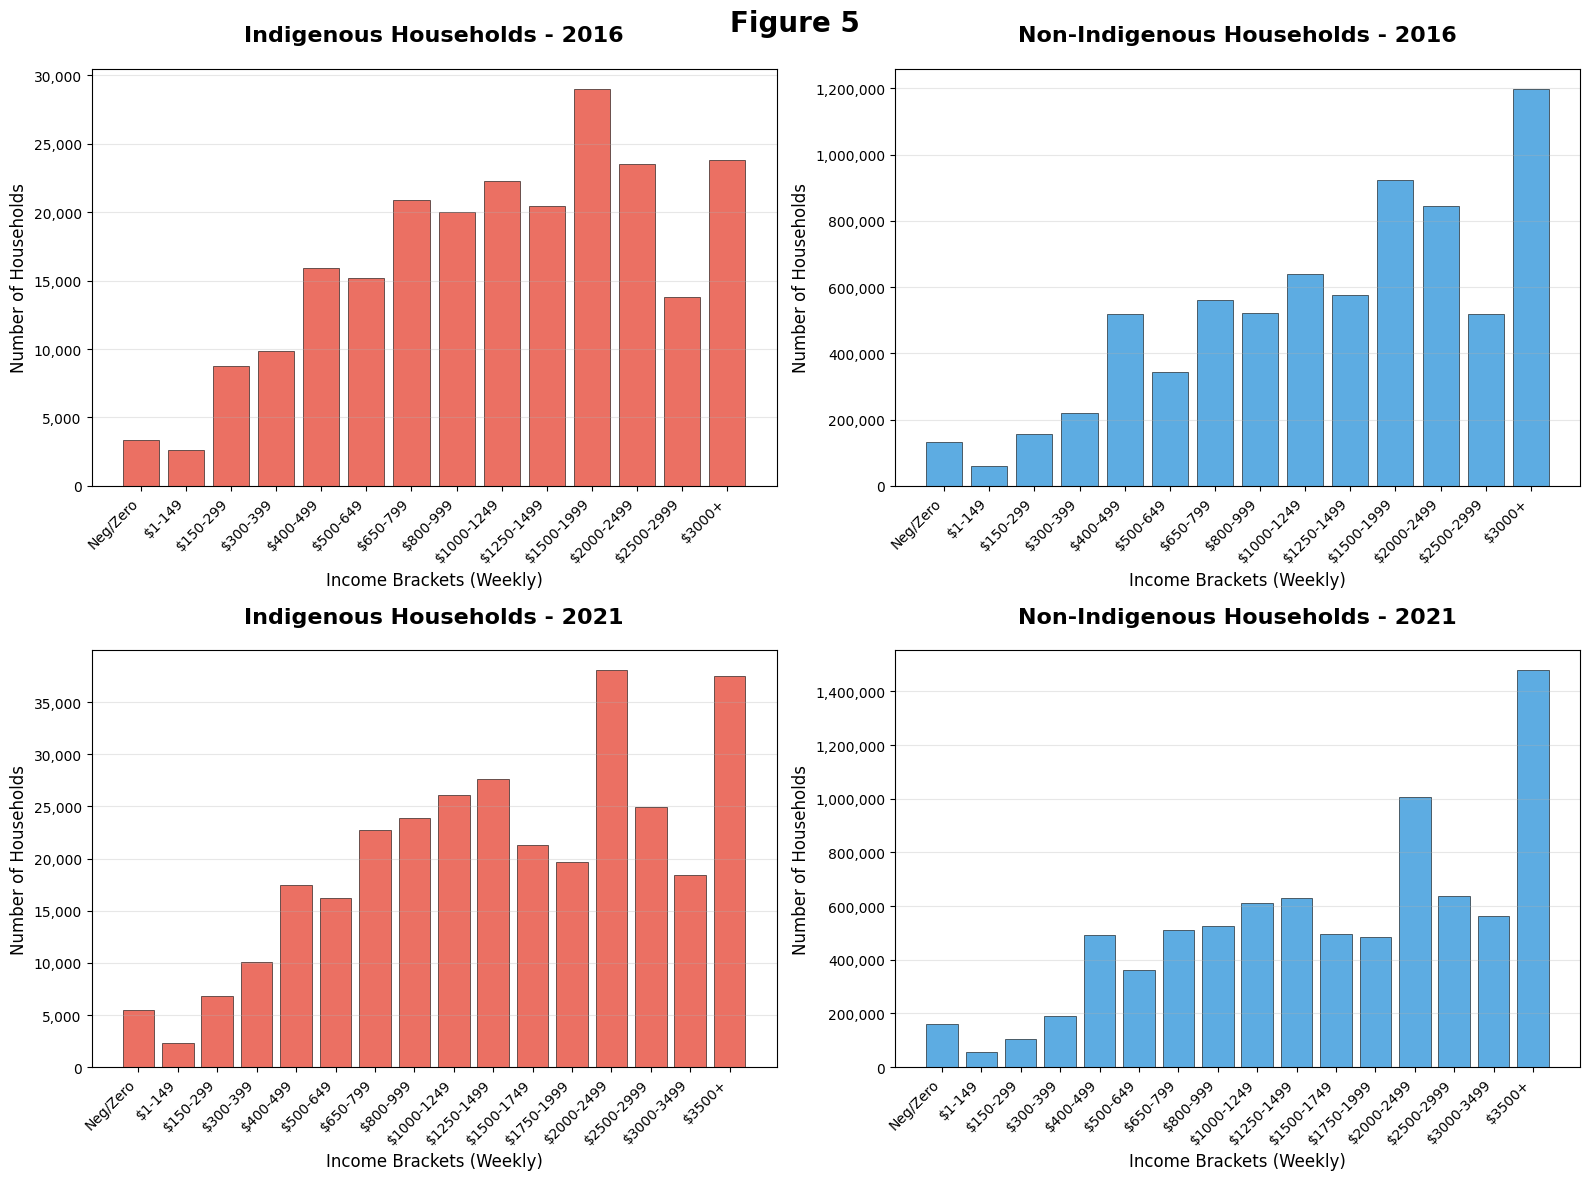

   Year  Median_Indigenous_Weekly_Household_Income  \
0  2016                                       1203   
1  2021                                       1507   

   Median_non_Indigenous_Weekly_Household_Income  
0                                           1446  
1                                           1757  


In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")

# Load and process 2016 data
incomeDistribution2016 = pd.read_csv('2016Census_I13_AUS.csv')
incomeDistribution2016 = incomeDistribution2016[['Neg_Nil_inc_hh_with_Ind_psns', 'Neg_Nil_inc_Other_households', 'HI1_149_Hhd_with_Indig_psns', 'HI1_149_Other_households', 'HI150_299_Hhd_with_Indig_psns', 'HI150_299_Other_households', 'HI300_399_Hhd_with_Indig_psns', 'HI300_399_Other_households', 'HI400_499_Hhd_with_Indig_psns', 'HI400_499_Other_households', 'HI500_649_Hhd_with_Indig_psns', 'HI500_649_Other_households', 'HI650_799_Hhd_with_Indig_psns', 'HI650_799_Other_households', 'HI800_999_Hh_with_Indig_psn', 'HI800_999_Other_households', 'HI1000_1249_Hh_with_Indig_psn', 'HI1000_1249_Other_households', 'HI1250_1499_Hh_with_Indig_psn', 'HI1250_1499_Other_households', 'HI1500_1999_Hh_with_Indig_psn', 'HI1500_1999_Other_households', 'HI2000_2499_Hh_with_Indig_psn', 'HI2000_2499_Other_households', 'HI2500_2999_Hh_with_Indig_psn', 'HI2500_2999_Other_households', 'HI3000_more_Hh_with_Indig_psn', 'HI3000_more_Other_households']]

incomeDistribution2016 = incomeDistribution2016.rename(columns={
    'Neg_Nil_inc_hh_with_Ind_psns': 'Indigenous_Negative_Or_Zero',
    'Neg_Nil_inc_Other_households': 'non_Indigenous_Negative_Or_Zero',
    'HI1_149_Hhd_with_Indig_psns': 'Indigenous_1_to_149',
    'HI1_149_Other_households': 'non_Indigenous_1_to_149',
    'HI150_299_Hhd_with_Indig_psns': 'Indigenous_150_to_299',
    'HI150_299_Other_households': 'non_Indigenous_150_to_299',
    'HI300_399_Hhd_with_Indig_psns': 'Indigenous_300_to_399',
    'HI300_399_Other_households': 'non_Indigenous_300_to_399',
    'HI400_499_Hhd_with_Indig_psns': 'Indigenous_400_to_499',
    'HI400_499_Other_households': 'non_Indigenous_400_to_499',
    'HI500_649_Hhd_with_Indig_psns': 'Indigenous_500_to_649',
    'HI500_649_Other_households': 'non_Indigenous_500_to_649',
    'HI650_799_Hhd_with_Indig_psns': 'Indigenous_650_to_799',
    'HI650_799_Other_households': 'non_Indigenous_650_to_799',
    'HI800_999_Hh_with_Indig_psn': 'Indigenous_800_to_999',
    'HI800_999_Other_households': 'non_Indigenous_800_to_999',
    'HI1000_1249_Hh_with_Indig_psn': 'Indigenous_1000_to_1249',
    'HI1000_1249_Other_households': 'non_Indigenous_1000_to_1249',
    'HI1250_1499_Hh_with_Indig_psn': 'Indigenous_1250_to_1499',
    'HI1250_1499_Other_households': 'non_Indigenous_1250_to_1499',
    'HI1500_1999_Hh_with_Indig_psn': 'Indigenous_1500_to_1999',
    'HI1500_1999_Other_households': 'non_Indigenous_1500_to_1999',
    'HI2000_2499_Hh_with_Indig_psn': 'Indigenous_2000_to_2499',
    'HI2000_2499_Other_households': 'non_Indigenous_2000_to_2499',
    'HI2500_2999_Hh_with_Indig_psn': 'Indigenous_2500_to_2999',
    'HI2500_2999_Other_households': 'non_Indigenous_2500_to_2999',
    'HI3000_more_Hh_with_Indig_psn': 'Indigenous_3000+',
    'HI3000_more_Other_households': 'non_Indigenous_3000+'
})

# Load and process 2021 data
incomeDistribution2021 = pd.read_csv('2021Census_I17_AUS_AUS.csv')
incomeDistribution2021 = incomeDistribution2021[['Neg_Nil_inc_Hh_with_Ind_psns', 'Neg_Nil_inc_Other_households', '1_149_Hhd_with_Indig_psns', '1_149_Other_households', '150_299_Hhd_with_Indig_psns', '150_299_Other_households', '300_399_Hhd_with_Indig_psns', '300_399_Other_households', '400_499_Hhd_with_Indig_psns', '400_499_Other_households', '500_649_Hhd_with_Indig_psns', '500_649_Other_households', '650_799_Hhd_with_Indig_psns', '650_799_Other_households', '800_999_Hh_with_Indig_psn', '800_999_Other_households', '1000_1249_Hh_with_Indig_psn', '1000_1249_Other_households', '1250_1499_Hh_with_Indig_psn', '1250_1499_Other_households', '1500_1749_Hh_with_Indig_psn', '1500_1749_Other_households', '1750_1999_Hh_with_Indig_psn', '1750_1999_Other_households','2000_2499_Hh_with_Indig_psn', '2000_2499_Other_households', '2500_2999_Hh_with_Indig_psn', '2500_2999_Other_households', '3000_3499_Hh_with_Indig_psn', '3000_3499_Other_households', '3500_more_Hh_with_Indig_psn', '3500_more_stated_Other_hhds']]

incomeDistribution2021 = incomeDistribution2021.rename(columns={
    'Neg_Nil_inc_Hh_with_Ind_psns': 'Indigenous_Negative_Or_Zero',
    'Neg_Nil_inc_Other_households': 'non_Indigenous_Negative_Or_Zero',
    '1_149_Hhd_with_Indig_psns': 'Indigenous_1_to_149',
    '1_149_Other_households': 'non_Indigenous_1_to_149',
    '150_299_Hhd_with_Indig_psns': 'Indigenous_150_to_299',
    '150_299_Other_households': 'non_Indigenous_150_to_299',
    '300_399_Hhd_with_Indig_psns': 'Indigenous_300_to_399',
    '300_399_Other_households': 'non_Indigenous_300_to_399',
    '400_499_Hhd_with_Indig_psns': 'Indigenous_400_to_499',
    '400_499_Other_households': 'non_Indigenous_400_to_499',
    '500_649_Hhd_with_Indig_psns': 'Indigenous_500_to_649',
    '500_649_Other_households': 'non_Indigenous_500_to_649',
    '650_799_Hhd_with_Indig_psns': 'Indigenous_650_to_799',
    '650_799_Other_households': 'non_Indigenous_650_to_799',
    '800_999_Hh_with_Indig_psn': 'Indigenous_800_to_999',
    '800_999_Other_households': 'non_Indigenous_800_to_999', 
    '1000_1249_Hh_with_Indig_psn': 'Indigenous_1000_to_1249',
    '1000_1249_Other_households': 'non_Indigenous_1000_to_1249',
    '1250_1499_Hh_with_Indig_psn': 'Indigenous_1250_to_1499',
    '1250_1499_Other_households': 'non_Indigenous_1250_to_1499',
    '1500_1749_Hh_with_Indig_psn': 'Indigenous_1500_to_1749',
    '1500_1749_Other_households': 'non_Indigenous_1500_to_1749',
    '1750_1999_Hh_with_Indig_psn': 'Indigenous_1750_to_1999',
    '1750_1999_Other_households': 'non_Indigenous_1750_to_1999',
    '2000_2499_Hh_with_Indig_psn': 'Indigenous_2000_to_2499',
    '2000_2499_Other_households': 'non_Indigenous_2000_to_2499',
    '2500_2999_Hh_with_Indig_psn': 'Indigenous_2500_to_2999',
    '2500_2999_Other_households': 'non_Indigenous_2500_to_2999',
    '3000_3499_Hh_with_Indig_psn': 'Indigenous_3000_to_3499',
    '3000_3499_Other_households': 'non_Indigenous_3000_to_3499',
    '3500_more_Hh_with_Indig_psn': 'Indigenous_3500+',
    '3500_more_stated_Other_hhds': 'non_Indigenous_3500+'
})

# Define income bracket labels for plotting
income_labels_2016 = [
    'Neg/Zero', '$1-149', '$150-299', '$300-399', '$400-499',
    '$500-649', '$650-799', '$800-999', '$1000-1249', '$1250-1499',
    '$1500-1999', '$2000-2499', '$2500-2999', '$3000+'
]

income_labels_2021 = [
    'Neg/Zero', '$1-149', '$150-299', '$300-399', '$400-499',
    '$500-649', '$650-799', '$800-999', '$1000-1249', '$1250-1499',
    '$1500-1749', '$1750-1999', '$2000-2499', '$2500-2999', 
    '$3000-3499', '$3500+'
]

# Extract data for 2016 (sum across all regions)
indigenous_2016_columns = [col for col in incomeDistribution2016.columns if col.startswith('Indigenous_')]
non_indigenous_2016_columns = [col for col in incomeDistribution2016.columns if col.startswith('non_Indigenous_')]

indigenous_2016_data = incomeDistribution2016[indigenous_2016_columns].sum()
non_indigenous_2016_data = incomeDistribution2016[non_indigenous_2016_columns].sum()

# Extract data for 2021 (sum across all regions)
indigenous_2021_columns = [col for col in incomeDistribution2021.columns if col.startswith('Indigenous_')]
non_indigenous_2021_columns = [col for col in incomeDistribution2021.columns if col.startswith('non_Indigenous_')]

indigenous_2021_data = incomeDistribution2021[indigenous_2021_columns].sum()
non_indigenous_2021_data = incomeDistribution2021[non_indigenous_2021_columns].sum()

# Create the 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Figure 5', 
             fontsize=20, fontweight='bold', y=0.98)

# Colors
indigenous_color = '#E74C3C'
non_indigenous_color = '#3498DB'

# 1. Indigenous Income 2016
axes[0, 0].bar(range(len(indigenous_2016_data)), indigenous_2016_data.values, 
               color=indigenous_color, alpha=0.8, edgecolor='black', linewidth=0.5)
axes[0, 0].set_title('Indigenous Households - 2016', fontsize=16, fontweight='bold', pad=20)
axes[0, 0].set_xlabel('Income Brackets (Weekly)', fontsize=12)
axes[0, 0].set_ylabel('Number of Households', fontsize=12)
axes[0, 0].set_xticks(range(len(income_labels_2016)))
axes[0, 0].set_xticklabels(income_labels_2016, rotation=45, ha='right')
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# 2. Non-Indigenous Income 2016
axes[0, 1].bar(range(len(non_indigenous_2016_data)), non_indigenous_2016_data.values, 
               color=non_indigenous_color, alpha=0.8, edgecolor='black', linewidth=0.5)
axes[0, 1].set_title('Non-Indigenous Households - 2016', fontsize=16, fontweight='bold', pad=20)
axes[0, 1].set_xlabel('Income Brackets (Weekly)', fontsize=12)
axes[0, 1].set_ylabel('Number of Households', fontsize=12)
axes[0, 1].set_xticks(range(len(income_labels_2016)))
axes[0, 1].set_xticklabels(income_labels_2016, rotation=45, ha='right')
axes[0, 1].grid(axis='y', alpha=0.3)
axes[0, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# 3. Indigenous Income 2021
axes[1, 0].bar(range(len(indigenous_2021_data)), indigenous_2021_data.values, 
               color=indigenous_color, alpha=0.8, edgecolor='black', linewidth=0.5)
axes[1, 0].set_title('Indigenous Households - 2021', fontsize=16, fontweight='bold', pad=20)
axes[1, 0].set_xlabel('Income Brackets (Weekly)', fontsize=12)
axes[1, 0].set_ylabel('Number of Households', fontsize=12)
axes[1, 0].set_xticks(range(len(income_labels_2021)))
axes[1, 0].set_xticklabels(income_labels_2021, rotation=45, ha='right')
axes[1, 0].grid(axis='y', alpha=0.3)
axes[1, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# 4. Non-Indigenous Income 2021
axes[1, 1].bar(range(len(non_indigenous_2021_data)), non_indigenous_2021_data.values, 
               color=non_indigenous_color, alpha=0.8, edgecolor='black', linewidth=0.5)
axes[1, 1].set_title('Non-Indigenous Households - 2021', fontsize=16, fontweight='bold', pad=20)
axes[1, 1].set_xlabel('Income Brackets (Weekly)', fontsize=12)
axes[1, 1].set_ylabel('Number of Households', fontsize=12)
axes[1, 1].set_xticks(range(len(income_labels_2021)))
axes[1, 1].set_xticklabels(income_labels_2021, rotation=45, ha='right')
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.93)

# Show the plot
plt.show()

import pandas as pd

# 2016 data
medianSalaries2016 = pd.read_csv('2016Census_I04_AUS.csv')
medianSalaries2016 = medianSalaries2016[['Me_hh_in_wk_In_ps_hh_In_ps', 'Me_hh_in_wk_No_In_ps_ot_hh']]
medianSalaries2016 = medianSalaries2016.rename(columns={
    'Me_hh_in_wk_In_ps_hh_In_ps': 'Median_Indigenous_Weekly_Household_Income',
    'Me_hh_in_wk_No_In_ps_ot_hh': 'Median_non_Indigenous_Weekly_Household_Income'
})
medianSalaries2016["Year"] = 2016

# 2021 data
medianSalaries2021 = pd.read_csv('2021Census_I04_AUS_AUS.csv')
medianSalaries2021 = medianSalaries2021[['Me_hh_in_wk_Hh_In_pe', 'Me_hh_in_wk_No_Ot_hh']]
medianSalaries2021 = medianSalaries2021.rename(columns={
    'Me_hh_in_wk_Hh_In_pe': 'Median_Indigenous_Weekly_Household_Income',
    'Me_hh_in_wk_No_Ot_hh': 'Median_non_Indigenous_Weekly_Household_Income'
})
medianSalaries2021["Year"] = 2021

# Combine them into one clean DataFrame
medianSalaries = pd.concat([medianSalaries2016, medianSalaries2021], ignore_index=True)

# Optional: reorder columns for clarity
medianSalaries = medianSalaries[['Year', 'Median_Indigenous_Weekly_Household_Income', 'Median_non_Indigenous_Weekly_Household_Income']]

print(medianSalaries)


The 8th target of the National Agreement on Closing the Gap is 'Strong economic participation and development of Aboriginal and
Torres Strait Islander people and communities' [5]. I created multiple histograms to visualise the distribution of weekly household incomes for both Indigenous and non-Indigenous households. The distributions show that for both 2016 and 2021 there is a greater leftward skew for non_Indigenous households, this means that on average there is a greater proportion of non-Indigenous households earning more. This is also supported by median weekly household income data, this shows than in 2016, Indigenous households earnt an average of $1,203 and non-Indigenous households earnt $1,507. Indigenous household income increased by $243 in 2021, compared to an increase of $311 for non-Indineous households. This is another example that although conditions are improving, the gap is still widening. 
<hr>

### References
[1] National Indigenous Australians Agency. (n.d.). Closing the Gap. Retrieved September 16, 2025, from https://www.niaa.gov.au/our-work/closing-gap

[2] Australian Government Department of Education. (n.d.). Closing the Gap in school education. Australian Government. https://www.education.gov.au/closing-the-gap/closing-gap-school-education

[3] Closing the Gap. (n.d.). Closing the Gap targets and outcomes. Australian Government. Retrieved September 18, 2025, from https://www.closingthegap.gov.au/national-agreement/targets

[4] Australian Bureau of Statistics. (2021, October 15). Census of Population and Housing: Census dictionary, 2021 — Housing suitability (HOSD). Retrieved from https://www.abs.gov.au/census/guide-census-data/census-dictionary/2021/variables-topic/housing/housing-suitability-hosd

[5] Australian Government. (2021, April). Targets under the National Agreement on Closing the Gap [PDF]. Closing the Gap. https://www.closingthegap.gov.au/sites/default/files/2021-04/poster-targets.pdf